# Iris Dataset Classification

### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Load the Iris dataset

In [2]:
df = pd.read_csv('D:\Codes\ML\Iris-Dataset\iris.data')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [3]:
# Display the first few rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
# shape of the dataset
print(df.shape)

(149, 5)


In [5]:
# describe the dataset
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# class distribution
print(df.groupby('class').size())

class
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [7]:
# checking for missing values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


### Visualization

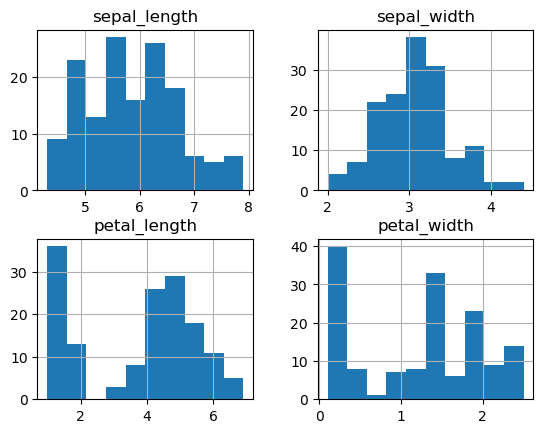

In [8]:
# histogram of the dataset
df.hist()
plt.show()

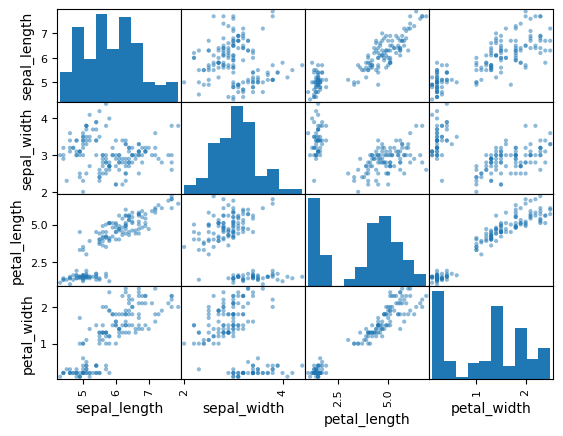

In [9]:
# scatter plot of the dataset
scatter_matrix(df)
plt.show()

### Validation set

In [10]:
arr = df.values
X = arr[:,0:4]
Y = arr[:,4]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 1)

### Build Model
1. Logistic Regression
2. RandomForest Classifier
3. K-Closest Classifier
4. Decision Tree Classifier

In [11]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    results.append(model.fit(X_train, Y_train))
    names.append(name)
    print('%s: %f' % (name, model.score(X_val, Y_val)))

LR: 0.933333
RF: 0.966667
KNN: 0.966667
CART: 0.966667


### Predictions

In [12]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_val)

In [13]:
print("Accuracy: ", accuracy_score(Y_val, pred))
print("Confusion Matrix:\n", confusion_matrix(Y_val, pred))
print("Classification Report:\n", classification_report(Y_val, pred))

Accuracy:  0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

